In [2]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
#import pandas as pd
import focal

# Simple script to inspect converted files

## Single event

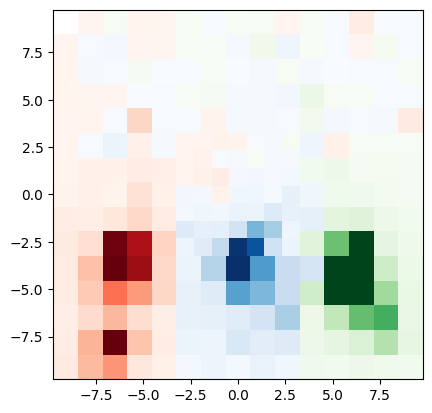

In [14]:
filename = "/home/bjartur/workspace/python_focalh_clustering/data/E150_P3_N100.root"
def plot_single(filename, event=0, ax=None):
    if ax is None:
        fig,ax = plt.subplots(figsize=(10,10))
        
    tfile = ROOT.TFile(filename, "READ")
    ttree = tfile.Get("EventsTree")
    foc = focal.FocalH()

    foc.heatmap(ttree, event, ax)
    tfile.Close()

fig,ax = plt.subplots()
plot_single(filename, 55, ax)
#fig.savefig("transform_heatmap.png", bbox_inches="tight")

#plot_single(filename, 1)

## Many events

In [ ]:
filename = "/home/bjartur/workspace/focalh_data_transformer/data/converted/E150_P2_N1000.root"
#file = ROOT.TFile("/home/bjartur/workspace/focalh_data_transformer/data/converted/E300_P2_N1000.root", "READ")


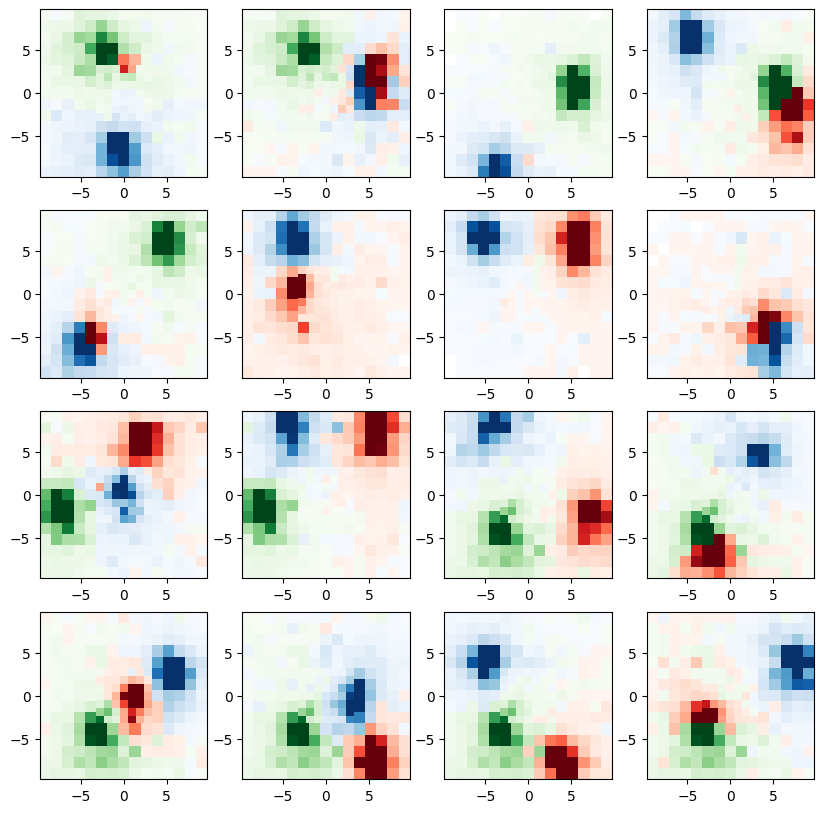

In [10]:
def plot_many(filename):
    tfile = ROOT.TFile(filename, "READ")
    ttree = tfile.Get("EventsTree")
    foc = focal.FocalH()

    rows=4
    cols=4
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(10,10))
    ax = ax.flatten()

    for i in range(rows*cols):
        ttree.GetEntry(i)
        foc.heatmap(ttree, i, ax[i])
    tfile.Close()

plot_many(filename)